In [12]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv(r"C:\Users\jatin\PycharmProjects\Data_Science_Files\Datasets\winemag-data-130k-v2.csv")
df

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
df.shape

(129971, 14)

In [ ]:
df[["country","description"]]

,country,description
0,Italy,"Aromas include tropical fruit, broom, brimston..."
1,Portugal,"This is ripe and fruity, a wine that is smooth..."
2,US,"Tart and snappy, the flavors of lime flesh and..."
3,US,"Pineapple rind, lemon pith and orange blossom ..."
4,US,"Much like the regular bottling from 2012, this..."
...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...
129967,US,Citation is given as much as a decade of bottl...
129968,France,Well-drained gravel soil gives this wine its c...
129969,France,"A dry style of Pinot Gris, this is crisp with ..."


In [ ]:
df.isnull().sum()

id                           0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
df.dropna()
df[["country","description"]]

,country,description
0,Italy,"Aromas include tropical fruit, broom, brimston..."
1,Portugal,"This is ripe and fruity, a wine that is smooth..."
2,US,"Tart and snappy, the flavors of lime flesh and..."
3,US,"Pineapple rind, lemon pith and orange blossom ..."
4,US,"Much like the regular bottling from 2012, this..."
...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...
129967,US,Citation is given as much as a decade of bottl...
129968,France,Well-drained gravel soil gives this wine its c...
129969,France,"A dry style of Pinot Gris, this is crisp with ..."


In [ ]:
text=df["description"][1:1000]
text

1      This is ripe and fruity, a wine that is smooth...
2      Tart and snappy, the flavors of lime flesh and...
3      Pineapple rind, lemon pith and orange blossom ...
4      Much like the regular bottling from 2012, this...
5      Blackberry and raspberry aromas show a typical...
                             ...                        
995    Edèlmio is a sophisticated and toasty blend of...
996    Here's a Syrah with bursting aromas of mature ...
997    Blended from a patchwork of old vineyards thro...
998    Rich in the mouth, this creamy and textural wi...
999    Creamy and textural, this brings on a nice mix...
Name: description, Length: 999, dtype: object

In [ ]:
text=df.description[0]
text

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [ ]:
obj=WordCloud().generate(text)
obj

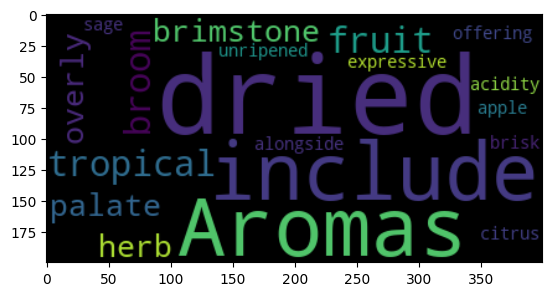

In [ ]:
plt.imshow(obj,interpolation='bilinear')